In [59]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Simulation Review

Let's play a game: we each roll a die. 

If my number is bigger: you pay me a dollar.

If they're the same: we do nothing.

If your number is bigger: I pay you a dollar.

Steps:
1. Find a way to simulate two dice rolls.
2. Compute how much money we win/lose based on the result.
3. Do steps 1 and 2 10,000 times.

In [60]:
def one_round(my_roll, your_roll):
    if my_roll > your_roll:
        return 1
    elif your_roll > my_roll:
        return -1
    elif your_roll == my_roll:
        return 0

In [61]:
one_round(6, 5)

1

In [62]:
one_round(5, 6)

-1

In [63]:
one_round(1,1)

0

In [69]:
help(np.random.choice)

Help on built-in function choice:

choice(...) method of numpy.random.mtrand.RandomState instance
    choice(a, size=None, replace=True, p=None)
    
    Generates a random sample from a given 1-D array
    
            .. versionadded:: 1.7.0
    
    .. note::
        New code should use the ``choice`` method of a ``default_rng()``
        instance instead; see `random-quick-start`.
    
    Parameters
    ----------
    a : 1-D array-like or int
        If an ndarray, a random sample is generated from its elements.
        If an int, the random sample is generated as if a were np.arange(a)
    size : int or tuple of ints, optional
        Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
        ``m * n * k`` samples are drawn.  Default is None, in which case a
        single value is returned.
    replace : boolean, optional
        Whether the sample is with or without replacement
    p : 1-D array-like, optional
        The probabilities associated with each entry i

In [64]:
die_faces = np.arange(1, 7)
die_faces

array([1, 2, 3, 4, 5, 6])

In [71]:
np.random.choice(die_faces)

1

In [72]:
def simulate_one_round():
    my_roll = np.random.choice(die_faces)
    your_roll = np.random.choice(die_faces)
    return one_round(my_roll, your_roll)

In [83]:
results = make_array() # initializing an empty array here,
# in anticipation for us to play more than one round, and to keep track of money owed

In [82]:
results = np.append(results, simulate_one_round())
results

array([ 1.,  1.,  1., -1.,  1.])

In [ ]:
help(np.append)

In [85]:
# play 5 rounds
results = make_array() # initializing an empty array here,
results = np.append(results, simulate_one_round())
results = np.append(results, simulate_one_round())
results = np.append(results, simulate_one_round())
results = np.append(results, simulate_one_round())
results = np.append(results, simulate_one_round())
results





array([-1., -1.,  1.,  1.,  1.])

In [89]:
# use a for loop
results = make_array() # initializing an empty array here,

for round in np.arange(1,6): #np.arange(5) = (1,2,3,4,5,6)
    results = np.append(results, simulate_one_round())
    print(round) # acts as a counter
    print(results)
results

1
[-1.]
2
[-1. -1.]
3
[-1. -1.  1.]
4
[-1. -1.  1.  1.]
5
[-1. -1.  1.  1.  0.]


array([-1., -1.,  1.,  1.,  0.])

In [ ]:
 # play 100 rounds
# hint: for loop would be nice here
    
    
    
    

In [92]:
game_outcomes = make_array()

for i in np.arange(10000): #np.arange(100) = (0,1,....99) <- 100 elements
    game_outcomes = np.append(game_outcomes, simulate_one_round())
    #print(i)
    #print(game_outcomes)
    
game_outcomes

array([ 1.,  0., -1., ..., -1.,  1.,  1.])

In [93]:
len(game_outcomes)


10000

In [108]:
# Bonus question: Can you find a way to run it without using a for loop?
#10,000 rounds
# hint: np.random.choice











round_outcomes = make_array(-1,-1,-1,-1,-1 ,0,0, 1,1,1,1,1)
round_outcomes_10000 = np.random.choice(round_outcomes, 10000)
round_outcomes

array([-1, -1, -1, -1, -1,  0,  0,  1,  1,  1,  1,  1])

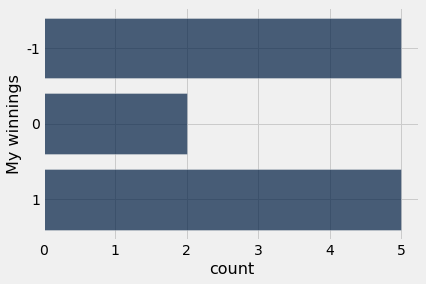

In [111]:
results = Table().with_column('My winnings', round_outcomes)
results.group('My winnings').barh('My winnings')

In [102]:
4084/10000
#propor

0.4084

In [103]:
1669/10000
# proportion of times we owed nothing

0.1669

In [106]:
4247/10000
# proportion of times you owed me 

0.4247

In [107]:
0.4/0.1669


2.396644697423607

## Simulation Continued - Heads and Tails

In [112]:
outcomes = make_array('heads', 'tails')
outcomes

array(['heads', 'tails'], dtype='<U5')

In [121]:
np.random.choice(outcomes)

'heads'

In [122]:
np.random.choice(outcomes, 10)

array(['heads', 'heads', 'heads', 'heads', 'tails', 'heads', 'tails',
       'heads', 'tails', 'tails'], dtype='<U5')

In [123]:
np.random.choice(outcomes, 10) == 'heads'

array([ True,  True, False,  True,  True, False, False, False, False,
       False])

In [125]:
sum(np.random.choice(outcomes, 10) == 'heads')
# we have this many number of heads 

6

In [126]:
sum(np.random.choice(outcomes, 10) == 'tails')

4

In [127]:
flips = np.random.choice(outcomes, 10)

In [128]:
sum(flips == 'heads')

3

In [129]:
sum(flips == 'tails')

7

In [130]:
def heads_in_100_tosses():
    return sum(np.random.choice(outcomes, 100) == 'heads')

In [131]:
results = make_array() # initializing an empty array, to collect stuff later

for i in np.arange(10000):
    results = np.append(results, heads_in_100_tosses())
    
results

array([50., 56., 50., ..., 55., 51., 48.])

In [133]:
len(results)
# we have 10,000 records of how many heads we got in a game of 100 tosses
# we play 10,000 games
# each game we toss the coin 100 times

10000

In [134]:
heads = Table().with_columns('Heads', results)
heads

Heads
50
56
50
47
49
56
53
51
55
54


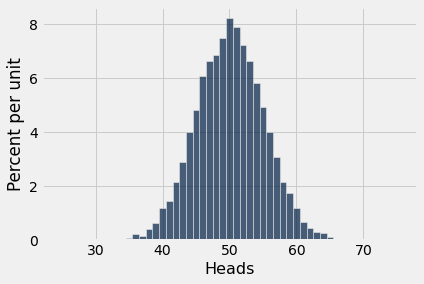

In [135]:
heads.hist('Heads', bins=np.arange(24.5, 76.5))

## Monty Hall

In [136]:
doors = make_array('car', 'first goat', 'second goat')
doors

array(['car', 'first goat', 'second goat'], dtype='<U11')

In [137]:
goats = make_array('first goat', 'second goat')

def other_goat(a_goat):
    if a_goat == 'first goat':
        return 'second goat'
    elif a_goat == 'second goat':
        return 'first goat'


In [138]:
other_goat('first goat')

'second goat'

In [139]:
other_goat('second goat')

'first goat'

In [140]:
other_goat('wheeler hall')

In [ ]:
def monty_hall():
    
    contestant_choice = np.random.choice(doors) # randomly select from car, first goat or second goat
    
    if contestant_choice == 'first goat':
        monty_choice = 'second goat'
        remaining_door = 'car'
        
    elif contestant_choice == 'second goat':
        monty_choice = 'first goat'
        remaining_door = 'car'
        
    elif contestant_choice == 'car':
        monty_choice = np.random.choice(goats) # randomly select door with first or second goat
        remaining_door = other_goat(monty_choice)
        
    return [contestant_choice, monty_choice, remaining_door]

In [141]:
monty_hall()
# the correct answer is to swap!

['second goat', 'first goat', 'car']

In [143]:
games = Table(['Guess', 'Revealed', 'Remaining'])
games

Guess,Revealed,Remaining


In [144]:
games.append(monty_hall())

Guess,Revealed,Remaining
second goat,first goat,car


In [145]:
games = Table(['Guess', 'Revealed', 'Remaining'])
for i in range(3000):
    games.append(monty_hall())
    
games

Guess,Revealed,Remaining
first goat,second goat,car
first goat,second goat,car
first goat,second goat,car
car,second goat,first goat
car,first goat,second goat
first goat,second goat,car
car,first goat,second goat
second goat,first goat,car
second goat,first goat,car
first goat,second goat,car


In [146]:
games.group('Remaining')
# what does the table below tell you?
# most of the time the remaining door, had a car behind it


Remaining,count
car,1977
first goat,486
second goat,537


In [148]:
1977/3001

0.6587804065311563

In [147]:
games.group('Guess')
# what does the table below tell you?
# we have 33% chance or 1/3 of the time, we selected a car on the first guess


Guess,count
car,1023
first goat,1007
second goat,970
